In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

In [2]:
df1 = pd.read_csv('ks-projects-201801.csv')

In [3]:
df1.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


#### We are going to dive into a dataset and perform some analytics, working with data collected from the Kickstarter platform, showing various projects that fall into 5 different categories - failed, successful, canceled, live, undefined, suspended. I would like to dig deeper and see what factors may affect these projects being into each particular category. Moreover, I will take a closer look at the differences between the main two categories - successful project and failed projects and find patterns that lead to a project succeed or fail. Last but not least, I will summarise my findings, aiming to predit how a project will perform before it is released.

In [4]:
df1.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#Creating a new column including the launched date but without the timestamp so it can be easily compared to the deadline date
df1['Launched_updated'] = df1['launched'].str[0:11]

In [6]:
df1['Launched_updated']
#Looks good

0         2015-08-11 
1         2017-09-02 
2         2013-01-12 
3         2012-03-17 
4         2015-07-04 
5         2016-02-26 
6         2014-12-01 
7         2016-02-01 
8         2014-04-24 
9         2014-07-11 
10        2013-09-09 
11        2013-03-09 
12        2014-09-02 
13        2016-02-09 
14        2017-04-05 
15        2015-01-29 
16        2014-10-09 
17        2015-04-10 
18        2012-08-02 
19        2012-05-03 
20        2013-11-25 
21        2017-08-08 
22        2014-05-16 
23        2015-01-26 
24        2014-10-23 
25        2010-12-07 
26        2015-12-06 
27        2014-11-14 
28        2015-12-29 
29        2017-04-03 
             ...     
378631    2014-09-03 
378632    2014-05-06 
378633    2014-11-13 
378634    2010-11-08 
378635    2015-08-25 
378636    2014-11-17 
378637    2017-08-29 
378638    2014-07-15 
378639    2015-11-03 
378640    2014-08-08 
378641    2015-07-06 
378642    2017-10-04 
378643    2014-05-05 
378644    2015-11-23 
378645    

In [7]:
# Creating a new column consisting of the calculated difference in days between the launched date and the deadline date so we can draw 
# some conclusions based on that difference. 
df1['deadline'] = pd.to_datetime(df1['deadline'])
df1['Launched_updated'] = pd.to_datetime(df1['Launched_updated'])
df1['Date_difference'] = df1['deadline'] - df1['Launched_updated']
df1['Date_difference'] 

0        59 days
1        60 days
2        45 days
3        30 days
4        56 days
5        35 days
6        20 days
7        45 days
8        35 days
9        30 days
10       30 days
11       30 days
12       30 days
13       45 days
14       28 days
15       30 days
16       30 days
17       30 days
18       15 days
19       30 days
20       35 days
21       30 days
22       30 days
23       30 days
24       20 days
25       30 days
26       30 days
27       30 days
28       30 days
29       30 days
           ...  
378631   30 days
378632   30 days
378633   30 days
378634   61 days
378635   30 days
378636   30 days
378637   45 days
378638   31 days
378639   30 days
378640   34 days
378641   60 days
378642   27 days
378643   21 days
378644   22 days
378645   30 days
378646   43 days
378647   30 days
378648   30 days
378649   60 days
378650   38 days
378651   30 days
378652   30 days
378653   30 days
378654   30 days
378655   45 days
378656   30 days
378657   27 days
378658   46 da

### Question N1: Which category has the most backers and the highest pledged amount in USD?

In [8]:
#Aggregating the data by main category
Category_sum = df1.groupby('main_category', as_index=False).sum()
print(Category_sum)

   main_category              ID          goal       pledged   backers  \
0            Art  30342957461667  1.149464e+09  1.015470e+08   1188200   
1         Comics  11507208333615  2.190160e+08  7.464365e+07   1458090   
2         Crafts   9500745050295  1.021164e+08  1.776030e+07    240342   
3          Dance   4052295222273  3.889078e+07  1.390693e+07    161275   
4         Design  32424491060437  1.405280e+09  8.154909e+08   7255880   
5        Fashion  24406041617687  5.662531e+08  1.494227e+08   1401993   
6   Film & Video  68351773147347  5.362378e+09  4.045744e+08   4197577   
7           Food  26616763116836  1.197964e+09  1.313787e+08   1332751   
8          Games  37772167373827  1.786610e+09  7.703319e+08  11336829   
9     Journalism   5118054303044  4.221659e+08  1.530200e+07    182091   
10         Music  55811584402193  8.336140e+08  2.072948e+08   2708475   
11   Photography  11550576040726  1.401619e+08  3.950123e+07    428078   
12    Publishing  42947707621989  1.16

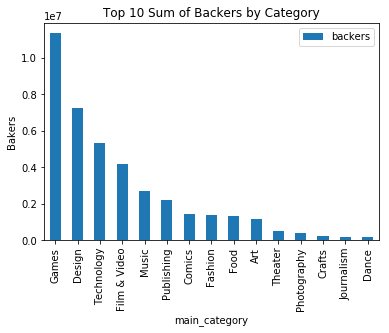

In [9]:
Category_sum1 = Category_sum.sort_values('backers', ascending=False)
Category_sum1.plot('main_category', 'backers', kind = 'bar', title = 'Top 10 Sum of Backers by Category')
plt.ylabel('Bakers')
plt.show()

#### The top 3 categories that have most backers are Games, Design and Technology. The least 'backed' category is Dance. 

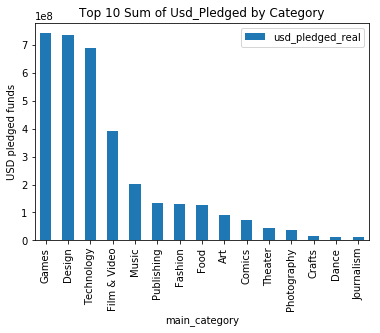

In [26]:
Category_sum2 = Category_sum.sort_values('usd_pledged_real', ascending=False)
Category_sum2.plot('main_category', 'usd_pledged_real', kind = 'bar', title = 'Top 10 Sum of Usd_Pledged by Category')
plt.ylabel('USD pledged funds')
plt.show()

#### The most funded categories are also Games, Design and Technology. This means that there might be a positive correletion between the number of backers and the amount pledged. We will look into this later in this project. The 3 least funded project categories are Journalism, Dance and Crafts. This m eans that projects who are classified to be in this categories are more likely to fail.

In [11]:
df1.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

#### For now, we will be interested to see the differences between the failed and the successful projects only as the total of successful + failed projects = 87 % of the total projects. That means that they hold the largest portion of all projects so analysing them can lead to coming up with significant conclusions. 

### Question N2: Do the successful projects have more backers than the failed ones?

In [12]:
#Creating a new dataframe that includes the successful projects only
df_success = df1[df1['state'] == "successful"]
df_success.head(10)
#Looks good

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Launched_updated,Date_difference
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-02-26,35 days
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-01,20 days
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00,2013-03-09,30 days
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73,2017-04-05,28 days
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00,2012-08-02,15 days
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.00,2013-11-25,35 days
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00,2014-10-23,20 days
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.00,2010-12-07,30 days
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04,2014-11-14,30 days
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91,2015-12-29,30 days


In [13]:
df_failed = df1[df1['state'] == "failed"]
df_failed.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Launched_updated,Date_difference
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015-08-11,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017-09-02,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013-01-12,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012-03-17,30 days
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,453.0,25000.00,2016-02-01,45 days
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.0,failed,0,CA,0.0,0.0,2406.39,2013-09-09,30 days
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.0,failed,0,US,0.0,0.0,5000.00,2014-09-02,30 days
13,1000056157,G-Spot Place for Gamers to connect with eachot...,Games,Games,USD,2016-03-25,200000.0,2016-02-09 23:01:12,0.0,failed,0,US,0.0,0.0,200000.00,2016-02-09,45 days
15,1000064368,Survival Rings,Design,Design,USD,2015-02-28,2500.0,2015-01-29 02:10:53,664.0,failed,11,US,664.0,664.0,2500.00,2015-01-29,30 days
16,1000064918,The Beard,Comic Books,Comics,USD,2014-11-08,1500.0,2014-10-09 22:27:52,395.0,failed,16,US,395.0,395.0,1500.00,2014-10-09,30 days


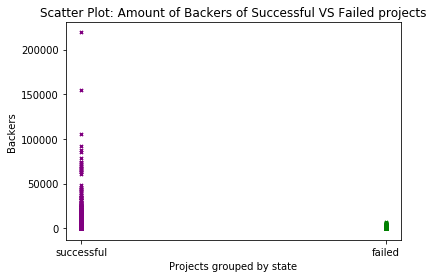

In [31]:
plt.scatter(
    x=df_success['state'],
    y=df_success['backers'],
    color='purple',
    marker='x', s=10
)
plt.scatter(
    x=df_failed['state'],
    y=df_failed['backers'],
    color='green',
    marker='x', s=10
)
plt.title('Scatter Plot: Amount of Backers of Successful VS Failed projects')
plt.xlabel('Projects grouped by state')
plt.ylabel('Backers')
plt.show()

In [16]:
backers_sum_s = df_success.groupby('state', as_index=False).sum()
print(backers_sum_s)
backers_sum_f = df_failed.groupby('state', as_index=False).sum()
print(backers_sum_f)
# How many percent of the total packers do failed projects hold>
3247011/38600861*100

        state               ID          goal       pledged   backers  \
0  successful  143832215325947  1.361390e+09  3.228310e+09  35353850   

    usd pledged  usd_pledged_real  usd_goal_real  
0  2.323123e+09      3.036889e+09   1.276983e+09  
    state               ID          goal       pledged  backers   usd pledged  \
0  failed  212476501281977  1.331575e+10  2.821394e+08  3247011  2.240431e+08   

   usd_pledged_real  usd_goal_real  
0      2.611085e+08   1.249085e+10  


8.411757965709626

#### Yes, when we total the backers of both successful and failed projects, the failed projects hold only 8.41 % of the total backers whereas the the successful is more than 90% which means that there is a huge difference between the backers of the successful projects and the failed ones. 

### Question N3: Is there a relationship between the amount of the backers and the pledged funds in usd for both successful and failed projects?

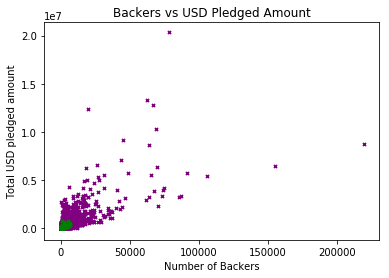

In [20]:
plt.scatter(
    x=df_success['backers'],
    y=df_success['usd_pledged_real'],
    color='purple',
    marker='x', s=10
)
plt.scatter(
    x=df_failed['backers'],
    y=df_failed['usd_pledged_real'],
    color='green',
    marker='x', s=10
)
plt.title('Backers vs USD Pledged Amount')
plt.xlabel('Number of Backers')
plt.ylabel('Total USD pledged amount')
plt.show()

#### When we visualise using scatterplot the relationship between the backers and the pledged usd funds, we observe a positive relationship between the two in the case of the successful projects. It is harder to judge for the failed projects, but this is because the scale is too big. Thus, we will plot only the failed ones: 

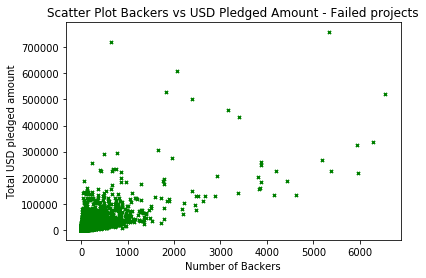

In [18]:
plt.scatter(
    x=df_failed['backers'],
    y=df_failed['usd_pledged_real'],
    color='green',
    marker='x', s=10)
plt.title('Scatter Plot Backers vs USD Pledged Amount - Failed projects')
plt.xlabel('Number of Backers')
plt.ylabel('Total USD pledged amount')
plt.show()


In [21]:
print(df_success['backers'].mean())
print(df_success['usd_pledged_real'].mean())
print(df_failed['backers'].mean())
print(df_failed['usd_pledged_real'].mean())

263.92136223834694
22670.795231195316
16.422351923689682
1320.60381678038


#### Supporting our conclusions based on the visualisations, we calculate the mean of both backers and usd pledged funds for both types of projects. We can observe that our observations match what the numbers show - more backers lead to more pledged funds and the successful projects have 247 more backers on average causing the difference of more than 20 000 usd between the two. This will lead to the conclusion that one of the factors that can cause a project to fail is the lack of backers interested in this project as less backers means less pledged funds in the project as we confirmed the positive relationship between the two.  

### Question N4: What is the best duration of the project to be held open in order to hit its target?
Lastly, we will take a look at the successful projects only and analyse which ones received the largest amounts of funds based on their duration. In other words, we already calculated the difference between the release date and the closing date(deadline) so, the next step is to group those differences in 19 equal ranges of 5 days in order to see the duration of the most successful projects.

In [22]:
df_agr2 = df_success.groupby('Date_difference', as_index=False)['usd_pledged_real'].sum()
df_agr2
df_agr2['integer'] = df_agr2.index/5
# converting the column to int so we can group by it
df_agr2['integer_updated'] = df_agr2['integer'].astype(int)

In [23]:
df_agr2_agr = df_agr2.groupby('integer_updated', as_index=False)['usd_pledged_real'].sum()
df_agr2_agr
# 19 ranges, so we should create a new column with the approprate labels

,integer_updated,usd_pledged_real
0,0,2.893638e+06
1,1,1.054625e+07
2,2,3.000246e+07
3,3,5.824356e+07
4,4,1.530532e+08
5,5,1.173227e+09
6,6,6.611687e+08
7,7,2.870710e+08
8,8,2.967638e+08
9,9,9.504593e+07


In [24]:
df_agr2_agr['range'] = ['1-5 days', '6- 10 days', '11-15 days','16-20 days','21-25 days','26-30 days','31-35 days','36-40 days','41-45 days','46-50 days','51-55 days',  '56-60 days','61-65 days','66-70 days','71-75 days','76-80 days','81-85 days','86-90 days','more than 90 days']

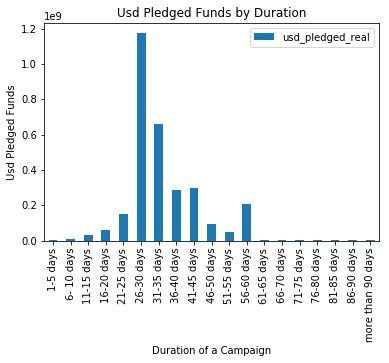

In [30]:
df_agr2_agr.plot('range', 'usd_pledged_real' , kind = 'bar', title = 'Usd Pledged Funds by Duration')
plt.ylabel('Usd Pledged Funds')
plt.xlabel('Duration of a Campaign')
plt.show()

#### The bar chart above shows that the most successful projects' campaigns have been running for 26 to 35 days. So a project which has a difference between its release date and its deadline more than 35 days and less than 26 days has a lower chances to be successful due to a probable lack of pledged funds.

## To summarise our findings:
### The top 3 categories that reveived the most funds and the largest number of backers are Games, Design and Technology. Projects which fall in any of those 3 categories are proven to have higher chances to meet their target amounts. Also, there is a strong positive relationship between the number of backers and the pledged funds so in general, project campaigns that have bigger exposure to more people have higher chances to turn out successful as it is proven that the successful projects have 84% more backers than the failed ones. Last but not least, the best duration for a project campaign to be open is between 26 and 35 days. If the difference between the launched date and the deadline is more than 35 days or less than 26, the chances of a project to be successful are less. 